<a href="https://colab.research.google.com/github/dinhtiendat2k3/BT-PTDL/blob/main/b%C3%A0i_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [5]:

chipo = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv', sep='\t')


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

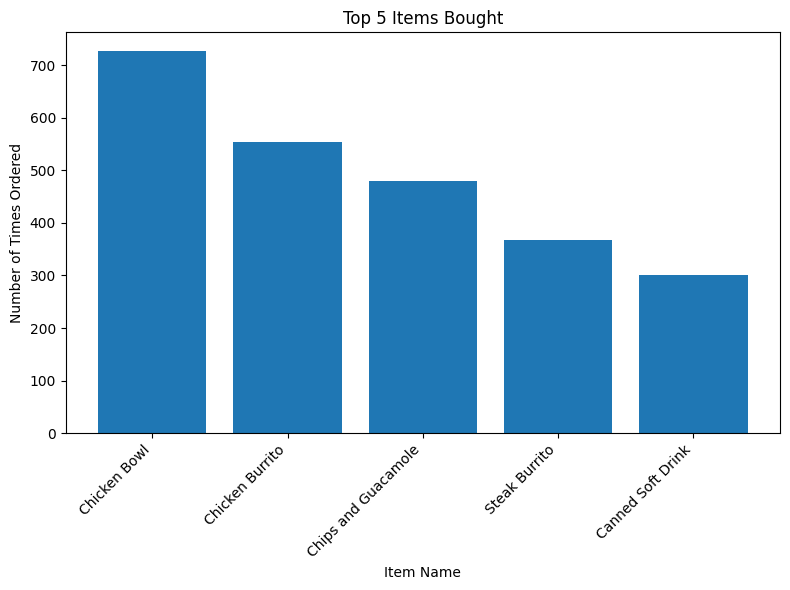

In [6]:

item_counts = chipo['item_name'].value_counts()
top_5_items = item_counts.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_5_items.index, top_5_items.values)
plt.xlabel("Item Name")
plt.ylabel("Number of Times Ordered")
plt.title("Top 5 Items Bought")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

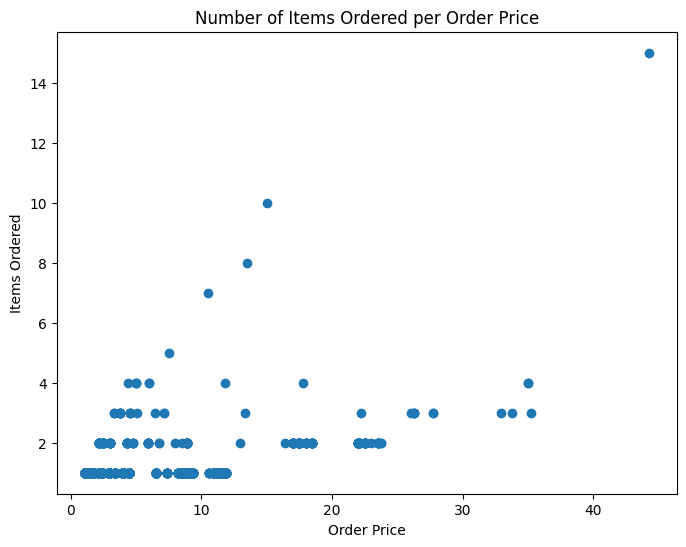

In [7]:

chipo['item_price'] = chipo['item_price'].str.replace('$', '', regex=False).astype(float)

# Create the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(chipo['item_price'], chipo['quantity'])
plt.xlabel("Order Price")
plt.ylabel("Items Ordered")
plt.title("Number of Items Ordered per Order Price")
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

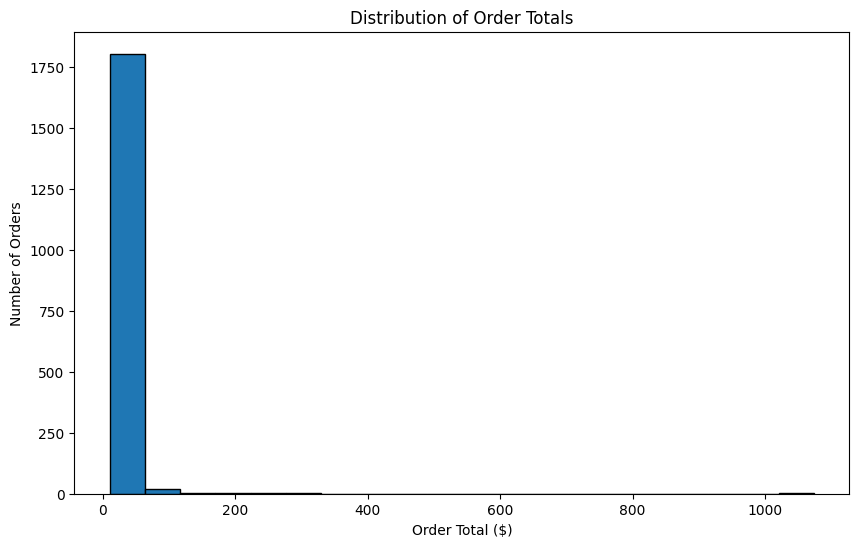

In [8]:

chipo['order_total'] = chipo['quantity'] * chipo['item_price']
order_totals = chipo.groupby('order_id')['order_total'].sum()


# Create a histogram of order totals
plt.figure(figsize=(10, 6))
plt.hist(order_totals, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Order Total ($)')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Totals')
plt.show()
